In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [6]:
## 1. Generate Training Data
def generate_data(num_points=6, x_min=0, x_max=5, noise_std=0.5):
    x = np.linspace(x_min, x_max, num_points)
    y_true = x ** 2
    y_noisy = y_true + np.random.normal(0, noise_std, size=y_true.shape)
    return x, y_noisy, y_true

x_train, y_train, y_true = generate_data()
X_train = x_train.reshape(-1, 1)
Y_train = y_train.reshape(-1, 1)

print("Training Data:")
for x, y in zip(x_train, y_train):
    print(f"x = {x:.2f}, y = {y:.2f}")

Training Data:
x = 0.00, y = 0.25
x = 1.00, y = 0.93
x = 2.00, y = 4.32
x = 3.00, y = 9.76
x = 4.00, y = 15.88
x = 5.00, y = 24.88


In [3]:
## 2. Neural Network Implementation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights with random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2  # Linear activation for output
    
    def backward(self, X, y, output, learning_rate):
        m = X.shape[0]  # Number of samples
        
        # Output layer error
        error_output = output - y
        dW2 = (1/m) * np.dot(self.a1.T, error_output)
        db2 = (1/m) * np.sum(error_output, axis=0, keepdims=True)
        
        # Hidden layer error
        error_hidden = np.dot(error_output, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, error_hidden)
        db1 = (1/m) * np.sum(error_hidden, axis=0, keepdims=True)
        
        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (MSE)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass and weight update
            self.backward(X, y, output, learning_rate)
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        return self.forward(X)

Epoch 0, Loss: 179.7862
Epoch 1000, Loss: 0.2517
Epoch 2000, Loss: 0.2306
Epoch 3000, Loss: 0.2302
Epoch 4000, Loss: 0.2302
Epoch 5000, Loss: 0.2302
Epoch 6000, Loss: 0.2302
Epoch 7000, Loss: 0.2302
Epoch 8000, Loss: 0.2302
Epoch 9000, Loss: 0.2302
Epoch 10000, Loss: 0.2302
Epoch 11000, Loss: 0.2302
Epoch 12000, Loss: 0.2302
Epoch 13000, Loss: 0.2302
Epoch 14000, Loss: 0.2302
Epoch 15000, Loss: 0.2302
Epoch 16000, Loss: 0.2302
Epoch 17000, Loss: 0.2302
Epoch 18000, Loss: 0.2302
Epoch 19000, Loss: 0.2302
Epoch 20000, Loss: 0.2302
Epoch 21000, Loss: 0.2302
Epoch 22000, Loss: 0.2302
Epoch 23000, Loss: 0.2302
Epoch 24000, Loss: 0.2302
Epoch 25000, Loss: 0.2302
Epoch 26000, Loss: 0.2302
Epoch 27000, Loss: 0.2302
Epoch 28000, Loss: 0.2302
Epoch 29000, Loss: 0.2302
Epoch 30000, Loss: 0.2302
Epoch 31000, Loss: 0.2302
Epoch 32000, Loss: 0.2302
Epoch 33000, Loss: 0.2302
Epoch 34000, Loss: 0.2302
Epoch 35000, Loss: 0.2302
Epoch 36000, Loss: 0.2302
Epoch 37000, Loss: 0.2302
Epoch 38000, Loss: 0.23

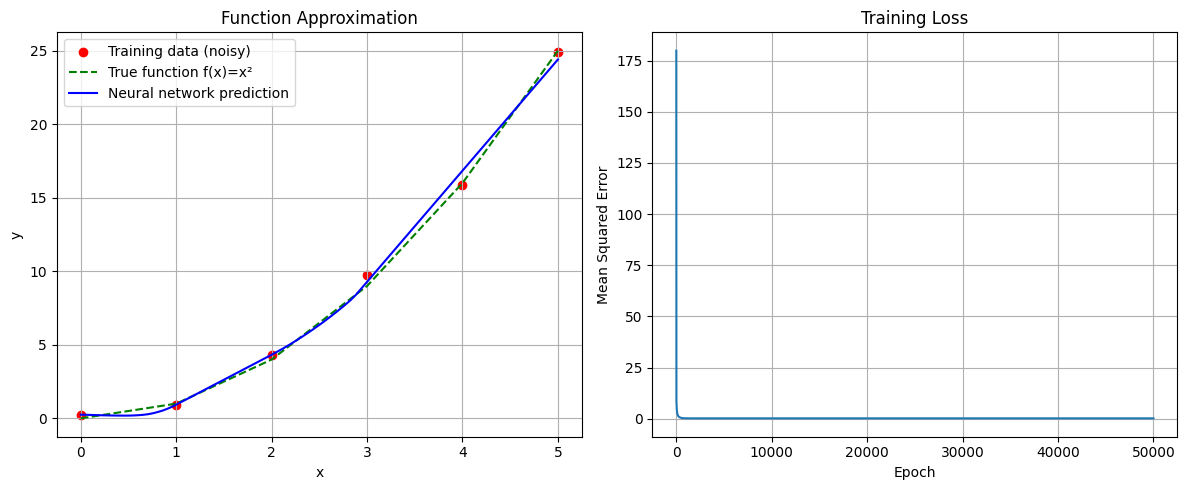


Model Predictions:
f(1.5) ≈ 2.63 (true value: 2.25)
f(2.8) ≈ 7.88 (true value: 7.84)
f(4.3) ≈ 19.11 (true value: 18.49)


In [10]:
## 3. Create and Train the Network
# Network architecture: 1 input, 4 hidden neurons, 1 output
nn = NeuralNetwork(input_size=1, hidden_size=1000, output_size=1)

# Training parameters
epochs = 50000
learning_rate = 0.01

# Train the network
losses = nn.train(X_train, Y_train, epochs, learning_rate)

## 4. Evaluate the Model
# Generate test points
x_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = nn.predict(x_test)

# Plot results
plt.figure(figsize=(12, 5))

# Plot the function approximation
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='red', label='Training data (noisy)')
plt.plot(x_train, y_true, 'g--', label='True function f(x)=x²')
plt.plot(x_test, y_pred, 'b-', label='Neural network prediction')
plt.title('Function Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Make Predictions
test_points = np.array([1.5, 2.8, 4.3]).reshape(-1, 1)
predictions = nn.predict(test_points)

print("\nModel Predictions:")
for x, pred in zip(test_points.flatten(), predictions.flatten()):
    print(f"f({x:.1f}) ≈ {pred:.2f} (true value: {x**2:.2f})")